# Overview
This tutorial looks at dimuon events in the ATLAS data. It largely follows the HSF tutorial here:
https://hsf-training.github.io/hsf-training-uproot-webpage/ 

At the end you will have to perform your own work. You are welcome to run the notebook to get the point where I ask you to do the exam question, though I recomend you follow the steps. 

# Setup
First time using uproot, need to conda install 

In [31]:
import uproot

## Install vector
https://pypi.org/project/vector/ 

In [32]:
import vector

## Download the data / quick look 
Go to this page: http://opendata.cern.ch/record/391# and download `DataMuons.root`

If you have trouble downloading, I have shared it with you on google drive. 

Then have a look at the file. 

In [33]:
file = uproot.open('DataMuons.root') 
file.keys() 

['mini;1']

In [34]:
file.classnames()

{'mini;1': 'TTree'}

In [35]:
tree = file['mini'] 
print("Print out all the branches" ) 
tree.keys() 

Print out all the branches


['runNumber',
 'eventNumber',
 'channelNumber',
 'mcWeight',
 'pvxp_n',
 'vxp_z',
 'scaleFactor_PILEUP',
 'scaleFactor_ELE',
 'scaleFactor_MUON',
 'scaleFactor_BTAG',
 'scaleFactor_TRIGGER',
 'scaleFactor_JVFSF',
 'scaleFactor_ZVERTEX',
 'trigE',
 'trigM',
 'passGRL',
 'hasGoodVertex',
 'lep_n',
 'lep_truthMatched',
 'lep_trigMatched',
 'lep_pt',
 'lep_eta',
 'lep_phi',
 'lep_E',
 'lep_z0',
 'lep_charge',
 'lep_type',
 'lep_flag',
 'lep_ptcone30',
 'lep_etcone20',
 'lep_trackd0pvunbiased',
 'lep_tracksigd0pvunbiased',
 'met_et',
 'met_phi',
 'jet_n',
 'alljet_n',
 'jet_pt',
 'jet_eta',
 'jet_phi',
 'jet_E',
 'jet_m',
 'jet_jvf',
 'jet_trueflav',
 'jet_truthMatched',
 'jet_SV0',
 'jet_MV1']

In [36]:
branches = tree.arrays()

# Digging into the data 
You now need to print out some of the properties 

In [37]:
for i in range(100):
    if(branches['lep_n'][i]==2):
        print(branches['lep_pt'][i])

[4.44e+04, 3.82e+04]
[5.95e+04, 7.64e+03]
[4.37e+04, 3.77e+04]
[5.27e+04, 4.82e+04]
[4.58e+04, 4.36e+04]


7028084


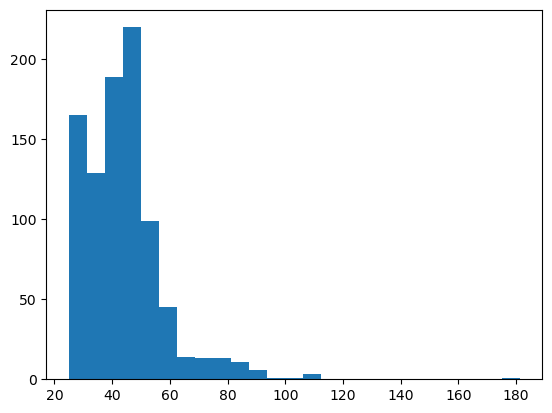

In [38]:
import matplotlib.pyplot as plt

N = len(branches)
print(N)

pt = [] 

for i in range(10000):
    if(branches['lep_n'][i]==2):
        lep = branches['lep_pt'][i]
        pt.append(lep[0]/1000.)

plt.hist(pt, bins = 25)
plt.show()

In [39]:
import awkward as ak
import numpy as np 

plt.hist(ak.flatten(dimuon_pt), bins=100, range = (0,100))
plt.xlabel('Muon $p_{\mathrm{T}}$ [GeV]')
plt.ylabel('Number of single muons / 1 GeV')
#plt.yscale('log')
plt.show()


NameError: name 'dimuon_pt' is not defined

Now we will create a list of masks and four-vectors using the `vector` package 

In [ ]:
import vector
two_muons_mask = branches['lep_n'] == 2 

muon_p4 = vector.zip({'pt': branches['lep_pt']/1000., 'eta': branches['lep_eta'], 'phi': branches['lep_phi'], 'energy': branches['lep_E']/1000.})
two_muons_p4 = muon_p4[two_muons_mask] 

In [ ]:
first_muon_p4 = two_muons_p4[:, 0]
second_muon_p4 = two_muons_p4[:, 1]

In [ ]:
plt.hist(first_muon_p4.deltaR(second_muon_p4), bins=30)
plt.xlabel('DeltaR')
plt.ylabel('Number of dimuon events')
#plt.xscale('log')
plt.yscale('log')
plt.show()


In [ ]:
sum_p4 = first_muon_p4 + second_muon_p4
plt.hist(sum_p4.mass, bins=np.logspace(np.log10(0.1), np.log10(1000), 200))
plt.xlabel('Dimuon invariant mass [GeV]')
plt.ylabel('Number of dimuon events')
plt.xscale('log')
plt.yscale('log')
plt.show()


In [ ]:
plt.hist(sum_p4.mass, bins=50, range = (2,4))
plt.xlabel('Dimuon invariant mass [GeV]')
plt.ylabel('Number of dimuon events')
#plt.yscale('log')
plt.show()


In [ ]:
plt.hist(sum_p4.mass, bins=50, range = (8.5,11.5))
plt.xlabel('Dimuon invariant mass [GeV]')
plt.ylabel('Number of dimuon events')
#plt.yscale('log')
plt.show()

## Fit the mass distribution 
We will use the Breit Wigner function

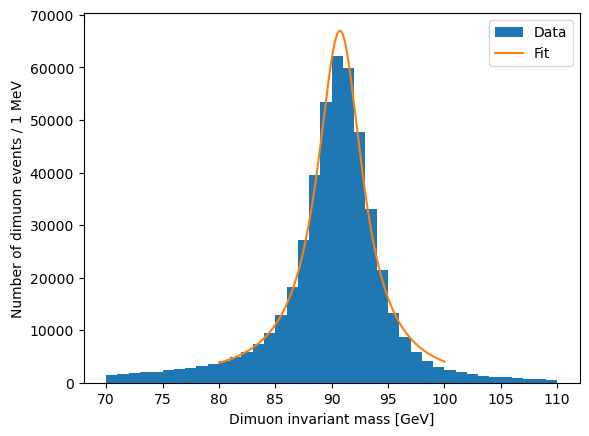

In [17]:
from scipy.optimize import curve_fit

def relativistic_breit_wigner(x, resonance_mass, width, normalization):
    gamma = np.sqrt(resonance_mass ** 2 * (resonance_mass ** 2 + width ** 2))
    k = 2.0 * np.sqrt(2) * resonance_mass * width * gamma / (np.pi * np.sqrt(resonance_mass ** 2 + gamma))
    return normalization * k / ((x ** 2 - resonance_mass ** 2) ** 2 + resonance_mass ** 2 * width ** 2)

bin_contents, bin_edges = np.histogram(sum_p4.mass.to_numpy(), bins=20, range=(80, 100))
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.0
popt, pcov = curve_fit(relativistic_breit_wigner, bin_centers, bin_contents, p0=[90, 10, 1000], sigma=np.sqrt(bin_contents))

plt.hist(sum_p4.mass, bins=40, range=(70, 110), label='Data')
x = np.linspace(80, 100, 200)
y = relativistic_breit_wigner(x, *popt)
plt.plot(x, y, label='Fit')
plt.xlabel('Dimuon invariant mass [GeV]')
plt.ylabel('Number of dimuon events / 1 MeV')
plt.legend()
plt.show()


m0:  3.0942166234934723
N J/Psi:  24019.787381800237


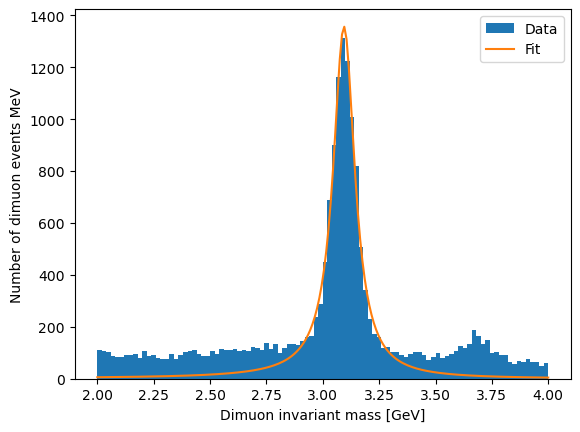

In [18]:
from scipy.optimize import curve_fit

def relativistic_breit_wigner(x, resonance_mass, width, normalization):
    gamma = np.sqrt(resonance_mass ** 2 * (resonance_mass ** 2 + width ** 2))
    k = 2.0 * np.sqrt(2) * resonance_mass * width * gamma / (np.pi * np.sqrt(resonance_mass ** 2 + gamma))
    return normalization * k / ((x ** 2 - resonance_mass ** 2) ** 2 + resonance_mass ** 2 * width ** 2)

#print ("fit BW:", (3.25-2.85)/20)

bin_contents, bin_edges = np.histogram(sum_p4.mass.to_numpy(), bins=20, range=(2.85, 3.25))
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.0
popt, pcov = curve_fit(relativistic_breit_wigner, bin_centers, bin_contents, p0=[3, 1, 1000], sigma=np.sqrt(bin_contents))

#print ("histo BW:", (4-2)/100)

plt.hist(sum_p4.mass, bins=100, range=(2, 4), label='Data')
x = np.linspace(2, 4, 200)#2,4,200
y = relativistic_breit_wigner(x, *popt)
 
print("m0: ", popt[0]) 
print("N J/Psi: ", sum(y))

plt.plot(x, y, label='Fit')
plt.xlabel('Dimuon invariant mass [GeV]')
plt.ylabel('Number of dimuon events MeV')
plt.legend()
plt.show()


10306.436091887017 18208.0
Signal is  7901.563908112983
10306.436091887017


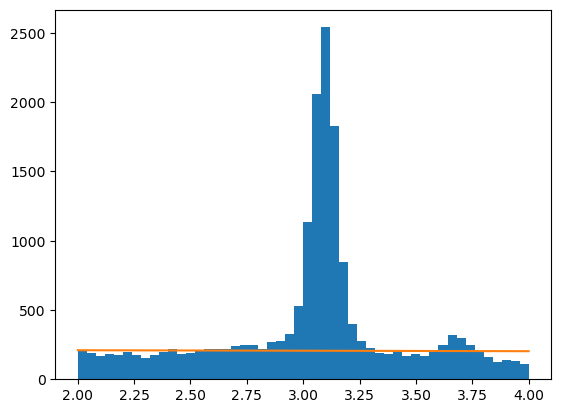

In [20]:
# Sean's awesome linear fit for background estimation

import scipy as sp
from scipy.integrate import quad,simpson
from numpy import array

(y, bins, patches) = plt.hist(sum_p4.mass, bins=50, range = (2,4))

bins = np.delete(bins,-1)

yn = array([])
binsn = array([])

for n in range(len(y)): 
    if n >= len(y): 
        break
    if y[n] < 400: 
        yn = np.append(yn,y[n])
        binsn = np.append(binsn,bins[n])

              
    
m, b = sp.stats.linregress(binsn,yn).slope, sp.stats.linregress(binsn,yn).intercept

def fitline(x,m,b): 
    return m*x + b

x = np.linspace(2,4,1000)

fit = fitline(x,m,b)

plt.plot(x,fit)

# print("The fit line has parameters m and b as ", slope,intercept)

background,trash = quad(fitline,2,4,(m,b))
background = background*25
total = sum(y)

# background = simpson(yfitdata,bins)
# approxbackground = sum(yn)
# total = sum(y)
print(background,total)
print("Signal is ",total - background)

print(background)






# Question 3


In [21]:
import numpy as np
genmass = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5,3,4,5,3,1,3,4,4,2,2,0,2,5,2,4,3,2,4,3,1,3,4,3,2,4,4,3,4,8,2,2,1,1,1,2,1,2,1,4,3,4,2,3,3,2,1,7,3,3,2,4,2,1,2,2,4,5,3,1,3,1,4,4,1,2,4,2,7,3,5,5,6,2,5,2,4,1,5,3,5,6,7,3,3,3,2,1,5,3,4,4,8,6,5,2,2,3,5,8,3,5,3,1,2,9,0,8,9,6,7,5,4,9,4,4,6,6,5,5,9,8,3,2,4,3,9,3,5,7,3,3,4,7,6,10,2,11,7,2,8,11,3,6,6,3,9,6,5,4,5,4,7,7,5,12,7,9,3,2,6,4,10,9,11,8,6,10,4,5,4,10,14,10,11,7,6,15,9,13,11,14,10,9,9,12,17,13,17,13,14,23,19,20,23,19,17,12,15,25,26,21,23,24,19,21,27,25,17,23,23,35,40,30,35,31,45,49,45,44,71,71,76,92,90,148,215,358,76,22059,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
print(genmass.shape)
x = np.linspace(8.7,11.2,1250)
Norm = np.sum(genmass) 
genmass = genmass/Norm

(1250,)


## Here's a plot of the distribution 

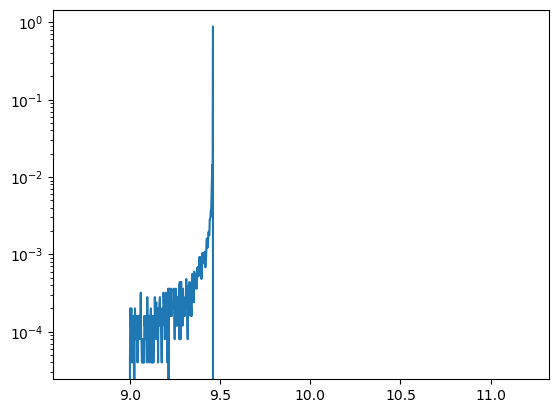

In [22]:
plt.plot(x,genmass)
plt.yscale('log')
plt.show()

## Here's how to make a histogram 
This also show how to use weights and use a random number method to get a new distribution. 

Note -- I expect you to actually generate the random distribution yourself. :) 

In [23]:
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(8.7, 11.2, 1250)
hist = np.histogram(X, weights = genmass, bins=1250)
hist_dist = scipy.stats.rv_histogram(hist, density=False)

fig, ax = plt.subplots()
ax.set_title("PDF from Template")
ax.hist(X,weights=genmass, density=False, bins=1250)
yrand = hist_dist.pdf(X)
sumyrand = sum(yrand)
yrand = yrand/sumyrand
ax.plot(X, yrand, label='PDF')
#ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()
plt.yscale('log')
plt.show()


TypeError: __init__() got an unexpected keyword argument 'density'

## Plotting a Guassian in python 
I show you where the packages are, and how to change the center (mean) and standard deviation, sigma. 

-2.3263478740408408


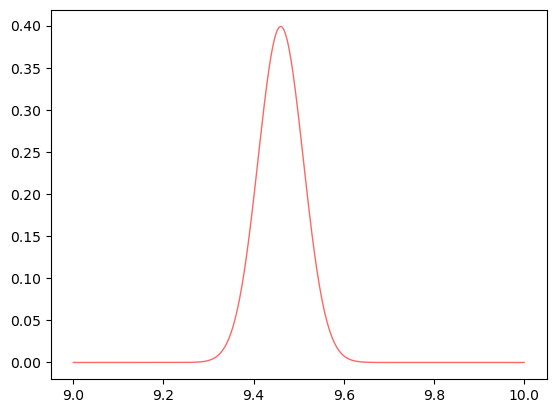

In [24]:
import numpy as np
from scipy.stats import norm 
mean = 9.46
sigma = 0.05 
fig, ax = plt.subplots(1, 1)
norm.pdf(x, loc=0, scale=1) 

print(norm.ppf(0.01))

x = np.linspace(9,
                10, 1000)

x_prime = (x-mean)/sigma



y = norm.pdf(x_prime)
ax.plot(x, y,
       'r-', lw=1, alpha=0.6, label='norm pdf')
plt.show()

(1250,)



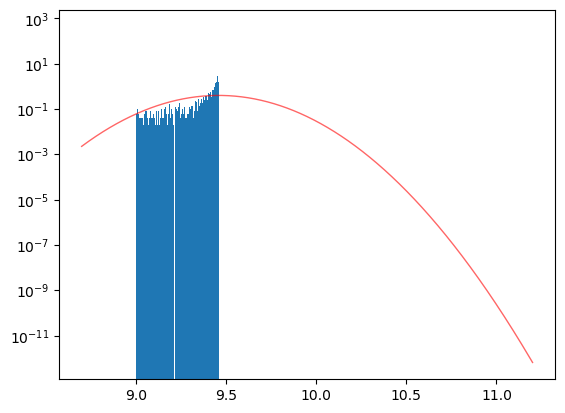

In [25]:
# (a)
print(genmass.shape)
print()

import numpy as np
from scipy.stats import norm,tstd
x = np.linspace(8.7,11.2,1250)
genmass = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5,3,4,5,3,1,3,4,4,2,2,0,2,5,2,4,3,2,4,3,1,3,4,3,2,4,4,3,4,8,2,2,1,1,1,2,1,2,1,4,3,4,2,3,3,2,1,7,3,3,2,4,2,1,2,2,4,5,3,1,3,1,4,4,1,2,4,2,7,3,5,5,6,2,5,2,4,1,5,3,5,6,7,3,3,3,2,1,5,3,4,4,8,6,5,2,2,3,5,8,3,5,3,1,2,9,0,8,9,6,7,5,4,9,4,4,6,6,5,5,9,8,3,2,4,3,9,3,5,7,3,3,4,7,6,10,2,11,7,2,8,11,3,6,6,3,9,6,5,4,5,4,7,7,5,12,7,9,3,2,6,4,10,9,11,8,6,10,4,5,4,10,14,10,11,7,6,15,9,13,11,14,10,9,9,12,17,13,17,13,14,23,19,20,23,19,17,12,15,25,26,21,23,24,19,21,27,25,17,23,23,35,40,30,35,31,45,49,45,44,71,71,76,92,90,148,215,358,76,22059,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
weightedx = 1/(sum(genmass))* (x * genmass)

mean = 9.46
sigma = tstd(weightedx)
fig, ax = plt.subplots(1, 1)
norm.pdf(x, loc=0, scale=1) 
x_prime = (x-mean)/sigma
y = norm.pdf(x_prime)

Norm = np.sum(genmass)
genmass = genmass/Norm

# ax.hist( x,weights=genmass,bins=50 )
ax.hist( x,weights=genmass,bins=1250,stacked=True,density=True ,log=True)

ax.plot(x, y,
       'r-', lw=1, alpha=0.6, label='norm pdf')
ax.set_yscale('log')

plt.show()

KeyboardInterrupt: 

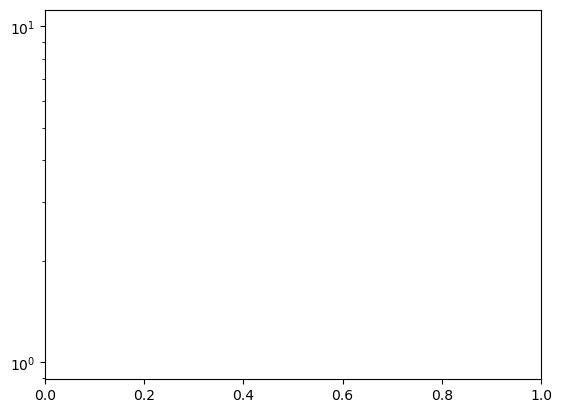

In [26]:
import random as r
(n,bins,garbage) = plt.hist( x,weights=genmass,bins=1250 )
plt.close()
# r.seed(a=5, version=2)


randhistn = np.zeros(len(x))
for i in range(len(x)): 
    if n[i] == 0: 
        continue
    for j in range(100000): 
        ra = r.random()
        if ra < n[i]: 
            randhistn[i] += 1
fig,ax2 = plt.subplots()

ax2.hist(x,weights=randhistn,log=True,bins=1250,stacked=True,density=True)
print(randhistn)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

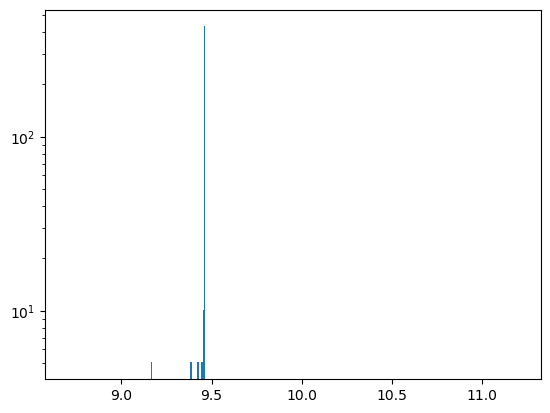

In [28]:
import random as r
(n,bins,garbage) = plt.hist( x,weights=genmass,bins=1250 )
plt.close()
# r.seed(a=5, version=2)
m0l = array([])

for h in range(1000):
    randhistn = np.zeros(len(x))
    for i in range(len(x)): 
        if n[i] == 0: 
            continue
        for j in range(100): 
            ra = r.random()
            if ra < n[i]: 
                randhistn[i] += 1
    wtdavg = np.average( x,weights=randhistn )
    m0l = np.append(m0l,wtdavg)
    print(str(h), end=' ')
fig,ax2 = plt.subplots()

ax2.hist(x,weights=randhistn,log=True,bins=1250,stacked=True,density=True)
print(randhistn)

[9.4476962  9.45092727 9.4456262  9.45608403 9.44320995 9.45787714
 9.44591491 9.45119909 9.45531854 9.44396772 9.45173346 9.45397818
 9.45007374 9.45046176 9.45580895 9.44898451 9.45565829 9.44941141
 9.45312775 9.44890215 9.45015352 9.44437572 9.45081848 9.45813228
 9.44931374 9.45178955 9.44971317 9.4506207  9.4530024  9.45027012
 9.45042387 9.45555068 9.45117541 9.44618028 9.44441906 9.44994733
 9.44821325 9.4518205  9.44100057 9.45526401 9.45248199 9.45114439
 9.4493795  9.45275755 9.45286896 9.45706109 9.45498022 9.45510914
 9.44908907 9.45199554 9.44049531 9.44521155 9.44501909 9.44481367
 9.45304454 9.45118811 9.44825166 9.45167064 9.44859888 9.44296172
 9.45321796 9.45268135 9.45205262 9.44677049 9.45656315 9.4572037
 9.45023284 9.44415088 9.45533343 9.44813249 9.44757883 9.44720646
 9.44393495 9.45694556 9.44805475 9.44759808 9.45534341 9.45398781
 9.44598895 9.45164986 9.44897031 9.45363383 9.4474826  9.45800425
 9.45745745 9.45260208 9.452067   9.45243528 9.45477048 9.45960

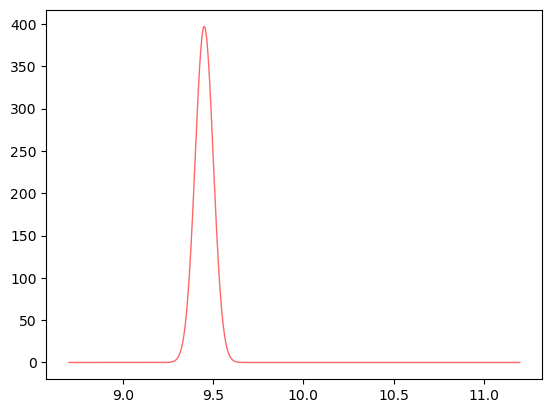

In [30]:
print(m0l)

import numpy as np
from scipy.stats import norm 
mean = 9.46060849
sigma = 0.05 
fig, ax = plt.subplots(1, 1)
norm.pdf(x, loc=0, scale=1) 


x = np.linspace(8.7,11.2,1250)
y = norm.pdf(x_prime)

for i in range(999): 
    mean = m0l[i]
    x_prime = (x-mean)/sigma
    y += norm.pdf(x_prime)
ax.plot(x, y,
       'r-', lw=1, alpha=0.6, label='norm pdf')
plt.show()
